# Esercitazione 12
**13  Maggio 2025**

In [1]:
import numpy as np
import scipy as sp
import SolveTriangular as st
import matplotlib.pyplot as plt

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

In [7]:
def eqnorm(A,b):
 
    G=A.T@A  
    f=A.T@b 
    
    L=sp.linalg.cholesky(G, lower=True)
    U=L.T

    x, flag = st.Lsolve(L, f)
    if flag == 0:
        x, flag = st.Usolve(U, x)

    residuo = np.linalg.norm(A@x-b)**2
        
    return x, residuo

### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [3]:
def qrLS(A,b):
    n=A.shape[1]  # numero di colonne di A
    Q,R=sp.linalg.qr(A)
    h=Q.T@b
    x,_ = st.Usolve(R[:n,:], h[:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [4]:
def SVDLS(A,b):
    m,n=A.shape  #numero di righe e  numero di colonne di A
    U,s,VT=sp.linalg.svd(A)  
    
    V=VT.T
    thresh=np.spacing(1)*m*s[0] ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    k=np.count_nonzero(s>thresh)
    
    d=U.T@b
    d1=d[:k].reshape((k,1)) 
    s1=s[:k].reshape((k,1))
    
    c=d1/s1 
    x=V[:,:k]@c
    residuo=np.linalg.norm(d[k:])**2
    return x,residuo

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [[1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



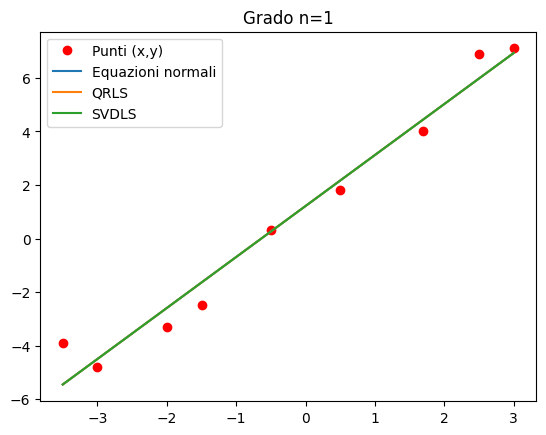

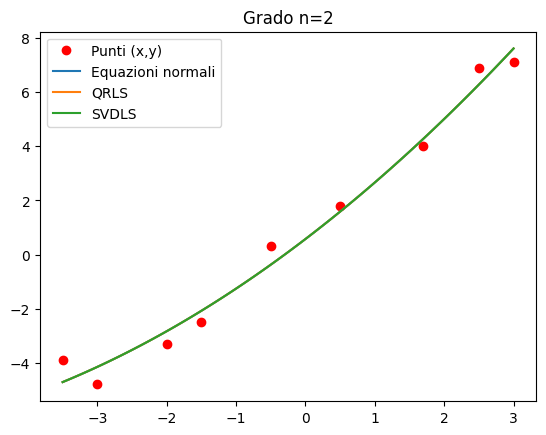

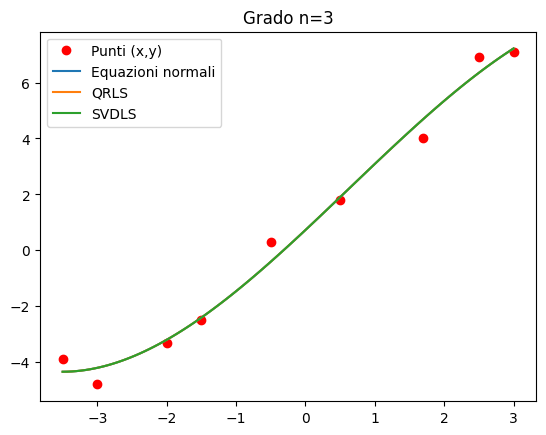

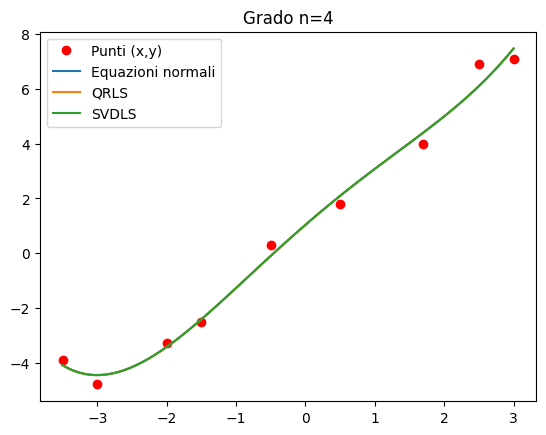

In [26]:
x = np.array([-3.5, -3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3])
y = np.array([-3.9, -4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])

m = x.shape[0]
for n in range(1, 5): # grado del polinomio
    n1=n+1 # grado di libertà

    A = np.vander(x, increasing=True)[:,:n1]
    x_eqn, residuo_eqn = eqnorm(A, y)
    x_qr, residuo_qr = qrLS(A, y)
    x_svd, residuo_svd = SVDLS(A, y)
    
    xx = np.linspace(np.min(x), np.max(x), 100)
    plt.title(f"Grado n={n}")
    plt.plot(x, y, "ro", label="Punti (x,y)")
    plt.plot(xx, np.polyval(np.flip(x_eqn), xx), label="Equazioni normali")
    plt.plot(xx, np.polyval(np.flip(x_qr), xx), label="QRLS")
    plt.plot(xx, np.polyval(np.flip(x_svd), xx), label="SVDLS")
    plt.legend()
    plt.show()


## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



Condizionamento di A (n=1): 4.663457775986456
Residuo eqn: 0.004502116118843385
Condizionamento di A (n=2): 65.67493525624784
Residuo qrLS: 0.0002364635594024984


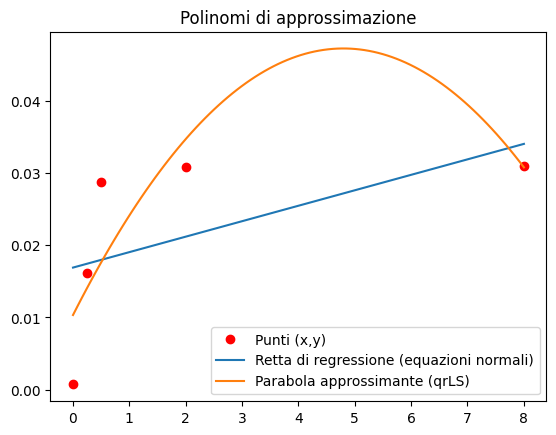

In [23]:
x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013])
y = np.array([0.0007, 0.0162, 0.0288, 0.0309, 0.0310])

m = x.shape[0]

# retta di regressione = polinomio di grado 1
n = 1
n1 = n+1
A = np.vander(x, increasing=True)[:,:n1]
print("Condizionamento di A (n=1):", np.linalg.cond(A))
# A ha un buon condizionamento, quindi posso usare il metodo delle equazioni normali che avrà condizionamento K(A)^2 
# perchè rimane comunque buono
x_eqn, residuo_eqn = eqnorm(A, y)
print("Residuo eqn:", residuo_eqn)

n = 2
n1 = n+1
A = np.vander(x, increasing=True)[:,:n1]
print("Condizionamento di A (n=2):", np.linalg.cond(A))
# A ha un medio condizionamento, quindi è preferibile usare il metodo qrLS
x_qr, residuo_qr = qrLS(A, y)
print("Residuo qrLS:", residuo_qr)

xx = np.linspace(np.min(x), np.max(x), 100)
plt.title("Polinomi di approssimazione")
plt.plot(x, y, "ro", label="Punti (x,y)")
plt.plot(xx, np.polyval(np.flip(x_eqn), xx), label="Retta di regressione (equazioni normali)")
plt.plot(xx, np.polyval(np.flip(x_qr), xx), label="Parabola approssimante (qrLS)")
plt.legend()
plt.show()

### Codici per l'interpolazione polinomiale nella forma di Lagrange 

Scrivere la function **interpL** che calcoli
il polinomio interpolante in forma di Lagrange  
Tale function deve assumere come dati in input:
 
 - x vettore dei nodi di interpolazione,
- y vettore dei valori della funzione nei nodi di interpolazione,
- xx vettore dei punti in cui si vuole valutare il polinomio interpolante.
 
In output deve essere restituito yy vettore contenente i valori assunti dal polinomio interpolante.

 
Funzioni Python  utili:
 
-  numpy.poly() restituisce i coefficienti di un polinomio di zeri assegnati,
 - numpy.polyval(p, x)  valuta un polinomio in un punto assegnato.
 

In [32]:
def plagr(xnodi,j):
    
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n] 
    else:
       xzeri=np.append(xnodi[:j], xnodi[j+1:n])
    
    num=np.poly(xzeri)
    den=np.polyval(num, xnodi[j])
    
    p= num/den
    
    return p



def InterpL(x, y, xx):
     
     n=x.size
     m=xx.size 
     L=np.zeros((m,n))
     for j in range(n):
        p=plagr(x, j)
        L[:,j]=np.polyval(p, xx) 
    
    
     return L@y

## Esercizio 1

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.

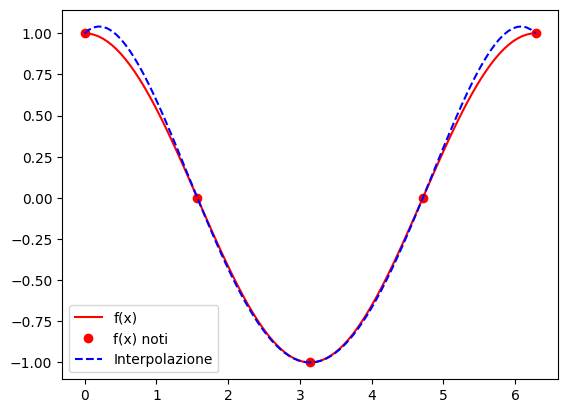

In [43]:
f = lambda x: np.sin(x)
# f = lambda x: np.cos(x)

x = np.arange(5) * np.pi / 2.0
fx = f(x)
xx = np.linspace(np.min(x), np.max(x), 100)
y = InterpL(x, fx, xx)

plt.plot(xx, f(xx), "r-", label="f(x)")
plt.plot(x, fx, "ro", label="f(x) noti")
plt.plot(xx, y, "b--", label="Interpolazione")
plt.legend()
plt.show()

## Esercizio 2
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

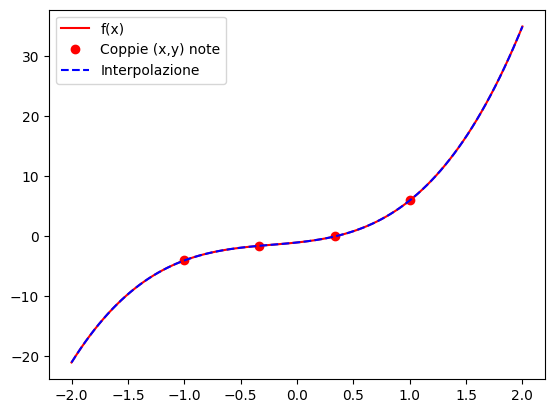

In [42]:
f = lambda x: 3*x**3 +2*x**2 +2*x -1
x = np.linspace(-1, 1, 4)
y = f(x)
xx = np.linspace(-2, 2, 100)
yy = InterpL(x, y, xx)

plt.plot(xx, f(xx), "r-", label="f(x)")
plt.plot(x, y, "ro", label="Coppie (x,y) note")
plt.plot(xx, yy, "b--", label="Interpolazione")
plt.legend()
plt.show()

## Esercizio 3

La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ nel seguente modo

L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])

T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.


## Esercizio 4 

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).

## Esercizio 5

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

## Esercizio 6

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.
